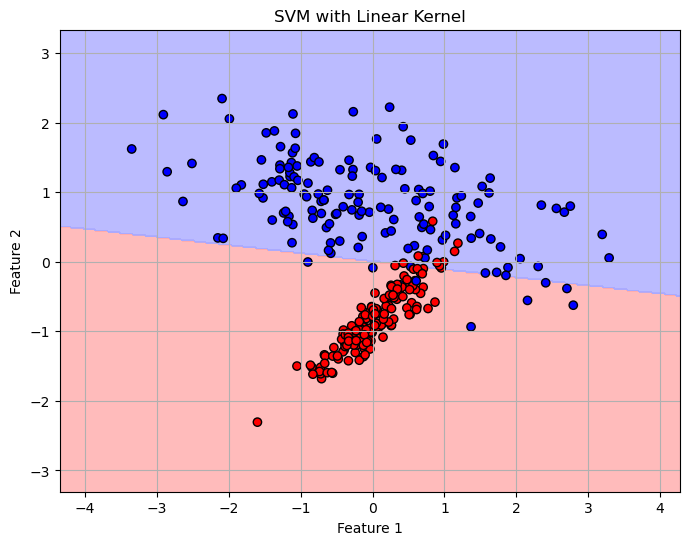

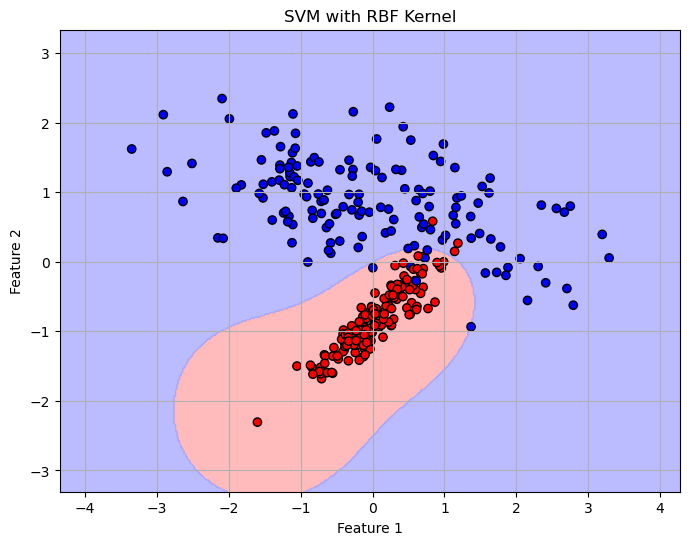

Best parameters from GridSearchCV:
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Cross-validation scores: [0.9        0.98333333 0.95       0.96666667 0.98333333]
Mean CV Accuracy: 95.67%

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.98      0.93      0.95        44

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap

# Load and prepare a dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM with Linear and RBF kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Visualize decision boundary using 2D data
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear, X_scaled, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_scaled, y, "SVM with RBF Kernel")

# Tune hyperparameters like C and gamma using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters from GridSearchCV:")
print(grid.best_params_)

# Use cross-validation
best_model = grid.best_estimator_

cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Final test evaluation
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))
